In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, scale
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
df = pd.read_csv("Hitters.csv")
df = df.dropna()

#one-hot encoding
dms = pd.get_dummies(df[["League", "Division", "NewLeague"]])

y = df["Salary"]
X_ = df.drop(["Salary", "League", "Division", "NewLeague"], axis = 1).astype("float64")
X = pd.concat([X_, dms[["League_N", "Division_W", "NewLeague_N"]]], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size = 0.25,
                                                    random_state = 42)

#### Model & Tahmin

In [3]:
rf_model = RandomForestRegressor(random_state=42).fit(X_train, y_train)

In [4]:
rf_model

RandomForestRegressor(random_state=42)

In [5]:
y_pred = rf_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

344.8191624908484

#### Model Tuning

In [8]:
rf_params = {"max_depth": [5,8,10],
             "max_features": [2,5,10],
             "n_estimators": [200, 500, 1000, 2000],
             "min_samples_split": [2, 10, 80, 100]}

In [9]:
rf_cv_model = GridSearchCV(rf_model, rf_params, cv = 10, n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 10 folds for each of 144 candidates, totalling 1440 fits
[CV] END max_depth=5, max_features=2, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END max_depth=5, max_features=2, min_samples_split=2, n_estimators=500; total time=   1.2s
[CV] END max_depth=5, max_features=2, min_samples_split=2, n_estimators=1000; total time=   2.4s
[CV] END max_depth=5, max_features=2, min_samples_split=10, n_estimators=200; total time=   0.5s
[CV] END max_depth=5, max_features=2, min_samples_split=10, n_estimators=200; total time=   0.5s
[CV] END max_depth=5, max_features=2, min_samples_split=10, n_estimators=200; total time=   0.5s
[CV] END max_depth=5, max_features=2, min_samples_split=10, n_estimators=200; total time=   0.5s
[CV] END max_depth=5, max_features=2, min_samples_split=10, n_estimators=200; total time=   0.5s
[CV] END max_depth=5, max_features=2, min_samples_split=10, n_estimators=500; total time=   1.3s
[CV] END max_depth=5, max_features=2, min_samples_split=10, n_es

[CV] END max_depth=5, max_features=2, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END max_depth=5, max_features=2, min_samples_split=2, n_estimators=500; total time=   1.2s
[CV] END max_depth=5, max_features=2, min_samples_split=2, n_estimators=1000; total time=   2.4s
[CV] END max_depth=5, max_features=2, min_samples_split=2, n_estimators=2000; total time=   5.1s
[CV] END max_depth=5, max_features=2, min_samples_split=10, n_estimators=1000; total time=   2.3s
[CV] END max_depth=5, max_features=2, min_samples_split=10, n_estimators=2000; total time=   4.5s
[CV] END max_depth=5, max_features=2, min_samples_split=80, n_estimators=1000; total time=   2.2s
[CV] END max_depth=5, max_features=2, min_samples_split=80, n_estimators=2000; total time=   4.3s
[CV] END max_depth=5, max_features=2, min_samples_split=100, n_estimators=1000; total time=   2.2s
[CV] END max_depth=5, max_features=2, min_samples_split=100, n_estimators=2000; total time=   4.5s
[CV] END max_depth=5, ma

[CV] END max_depth=5, max_features=2, min_samples_split=2, n_estimators=500; total time=   1.2s
[CV] END max_depth=5, max_features=2, min_samples_split=2, n_estimators=1000; total time=   2.4s
[CV] END max_depth=5, max_features=2, min_samples_split=2, n_estimators=2000; total time=   4.8s
[CV] END max_depth=5, max_features=2, min_samples_split=10, n_estimators=1000; total time=   2.3s
[CV] END max_depth=5, max_features=2, min_samples_split=10, n_estimators=2000; total time=   4.5s
[CV] END max_depth=5, max_features=2, min_samples_split=80, n_estimators=500; total time=   1.1s
[CV] END max_depth=5, max_features=2, min_samples_split=80, n_estimators=2000; total time=   4.2s
[CV] END max_depth=5, max_features=2, min_samples_split=100, n_estimators=500; total time=   1.1s
[CV] END max_depth=5, max_features=2, min_samples_split=100, n_estimators=500; total time=   1.1s
[CV] END max_depth=5, max_features=2, min_samples_split=100, n_estimators=1000; total time=   2.1s
[CV] END max_depth=5, ma

[CV] END max_depth=5, max_features=2, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END max_depth=5, max_features=2, min_samples_split=2, n_estimators=1000; total time=   2.4s
[CV] END max_depth=5, max_features=2, min_samples_split=2, n_estimators=2000; total time=   5.0s
[CV] END max_depth=5, max_features=2, min_samples_split=10, n_estimators=500; total time=   1.2s
[CV] END max_depth=5, max_features=2, min_samples_split=10, n_estimators=2000; total time=   4.7s
[CV] END max_depth=5, max_features=2, min_samples_split=80, n_estimators=500; total time=   1.1s
[CV] END max_depth=5, max_features=2, min_samples_split=80, n_estimators=500; total time=   1.1s
[CV] END max_depth=5, max_features=2, min_samples_split=80, n_estimators=1000; total time=   2.1s
[CV] END max_depth=5, max_features=2, min_samples_split=100, n_estimators=200; total time=   0.4s
[CV] END max_depth=5, max_features=2, min_samples_split=100, n_estimators=200; total time=   0.4s
[CV] END max_depth=5, max_f

[CV] END max_depth=5, max_features=2, min_samples_split=2, n_estimators=500; total time=   1.2s
[CV] END max_depth=5, max_features=2, min_samples_split=2, n_estimators=1000; total time=   2.4s
[CV] END max_depth=5, max_features=2, min_samples_split=2, n_estimators=2000; total time=   5.1s
[CV] END max_depth=5, max_features=2, min_samples_split=10, n_estimators=1000; total time=   2.3s
[CV] END max_depth=5, max_features=2, min_samples_split=10, n_estimators=2000; total time=   4.5s
[CV] END max_depth=5, max_features=2, min_samples_split=80, n_estimators=1000; total time=   2.2s
[CV] END max_depth=5, max_features=2, min_samples_split=80, n_estimators=2000; total time=   4.2s
[CV] END max_depth=5, max_features=2, min_samples_split=100, n_estimators=1000; total time=   2.2s
[CV] END max_depth=5, max_features=2, min_samples_split=100, n_estimators=2000; total time=   4.4s
[CV] END max_depth=5, max_features=5, min_samples_split=2, n_estimators=500; total time=   1.4s
[CV] END max_depth=5, ma

[CV] END max_depth=5, max_features=2, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END max_depth=5, max_features=2, min_samples_split=2, n_estimators=500; total time=   1.3s
[CV] END max_depth=5, max_features=2, min_samples_split=2, n_estimators=1000; total time=   2.3s
[CV] END max_depth=5, max_features=2, min_samples_split=2, n_estimators=2000; total time=   4.9s
[CV] END max_depth=5, max_features=2, min_samples_split=10, n_estimators=1000; total time=   2.5s
[CV] END max_depth=5, max_features=2, min_samples_split=10, n_estimators=2000; total time=   4.4s
[CV] END max_depth=5, max_features=2, min_samples_split=80, n_estimators=1000; total time=   2.1s
[CV] END max_depth=5, max_features=2, min_samples_split=80, n_estimators=2000; total time=   4.3s
[CV] END max_depth=5, max_features=2, min_samples_split=100, n_estimators=500; total time=   1.2s
[CV] END max_depth=5, max_features=2, min_samples_split=100, n_estimators=1000; total time=   2.1s
[CV] END max_depth=5, max

In [10]:
rf_cv_model.best_params_

{'max_depth': 8,
 'max_features': 2,
 'min_samples_split': 2,
 'n_estimators': 200}

In [11]:
rf_model = RandomForestRegressor(random_state=42, max_depth=8, max_features=2, min_samples_split=2, n_estimators=200)
rf_tuned = rf_model.fit(X_train, y_train)

In [12]:
y_pred = rf_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

349.1649379391149

### Değişken Önem Düzeyi

In [13]:
rf_tuned.feature_importances_*100

array([5.81548333, 6.38504706, 3.52630602, 4.18186433, 4.68121896,
       4.92291235, 7.38388416, 9.72940722, 8.68736867, 7.89130478,
       8.78157948, 8.30862336, 9.69431474, 4.71131944, 2.04114365,
       1.83878075, 0.38469815, 0.55485771, 0.47988582])

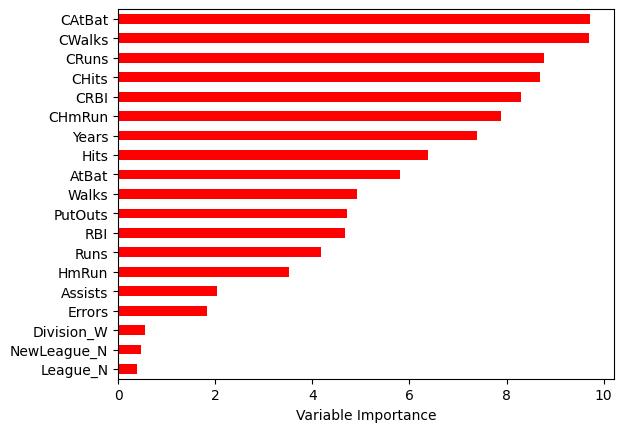

[CV] END max_depth=10, max_features=2, min_samples_split=10, n_estimators=2000; total time=   4.5s
[CV] END max_depth=10, max_features=2, min_samples_split=80, n_estimators=1000; total time=   2.2s
[CV] END max_depth=10, max_features=2, min_samples_split=80, n_estimators=2000; total time=   5.0s
[CV] END max_depth=10, max_features=2, min_samples_split=100, n_estimators=1000; total time=   2.1s
[CV] END max_depth=10, max_features=2, min_samples_split=100, n_estimators=2000; total time=   4.2s
[CV] END max_depth=10, max_features=5, min_samples_split=2, n_estimators=500; total time=   1.4s
[CV] END max_depth=10, max_features=5, min_samples_split=2, n_estimators=1000; total time=   2.8s
[CV] END max_depth=10, max_features=5, min_samples_split=2, n_estimators=2000; total time=   5.6s
[CV] END max_depth=10, max_features=5, min_samples_split=10, n_estimators=1000; total time=   2.5s
[CV] END max_depth=10, max_features=5, min_samples_split=80, n_estimators=200; total time=   0.5s
[CV] END max_

[CV] END max_depth=8, max_features=10, min_samples_split=2, n_estimators=500; total time=   1.6s
[CV] END max_depth=8, max_features=10, min_samples_split=2, n_estimators=2000; total time=   6.7s
[CV] END max_depth=8, max_features=10, min_samples_split=10, n_estimators=500; total time=   1.6s
[CV] END max_depth=8, max_features=10, min_samples_split=10, n_estimators=500; total time=   1.6s
[CV] END max_depth=8, max_features=10, min_samples_split=10, n_estimators=1000; total time=   2.9s
[CV] END max_depth=8, max_features=10, min_samples_split=10, n_estimators=2000; total time=   5.9s
[CV] END max_depth=8, max_features=10, min_samples_split=80, n_estimators=1000; total time=   2.2s
[CV] END max_depth=8, max_features=10, min_samples_split=80, n_estimators=2000; total time=   4.5s
[CV] END max_depth=8, max_features=10, min_samples_split=100, n_estimators=1000; total time=   2.3s
[CV] END max_depth=8, max_features=10, min_samples_split=100, n_estimators=2000; total time=   5.3s
[CV] END max_

[CV] END max_depth=10, max_features=5, min_samples_split=2, n_estimators=500; total time=   1.4s
[CV] END max_depth=10, max_features=5, min_samples_split=2, n_estimators=1000; total time=   2.8s
[CV] END max_depth=10, max_features=5, min_samples_split=10, n_estimators=200; total time=   0.5s
[CV] END max_depth=10, max_features=5, min_samples_split=10, n_estimators=200; total time=   0.5s
[CV] END max_depth=10, max_features=5, min_samples_split=10, n_estimators=200; total time=   0.5s
[CV] END max_depth=10, max_features=5, min_samples_split=10, n_estimators=200; total time=   0.5s
[CV] END max_depth=10, max_features=5, min_samples_split=10, n_estimators=200; total time=   0.5s
[CV] END max_depth=10, max_features=5, min_samples_split=10, n_estimators=500; total time=   1.2s
[CV] END max_depth=10, max_features=5, min_samples_split=10, n_estimators=500; total time=   1.3s
[CV] END max_depth=10, max_features=5, min_samples_split=10, n_estimators=1000; total time=   2.5s
[CV] END max_depth=1

[CV] END max_depth=10, max_features=2, min_samples_split=100, n_estimators=500; total time=   1.1s
[CV] END max_depth=10, max_features=2, min_samples_split=100, n_estimators=1000; total time=   2.4s
[CV] END max_depth=10, max_features=5, min_samples_split=2, n_estimators=200; total time=   0.6s
[CV] END max_depth=10, max_features=5, min_samples_split=2, n_estimators=200; total time=   0.6s
[CV] END max_depth=10, max_features=5, min_samples_split=2, n_estimators=200; total time=   0.6s
[CV] END max_depth=10, max_features=5, min_samples_split=2, n_estimators=200; total time=   0.6s
[CV] END max_depth=10, max_features=5, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END max_depth=10, max_features=5, min_samples_split=2, n_estimators=500; total time=   1.4s
[CV] END max_depth=10, max_features=5, min_samples_split=2, n_estimators=1000; total time=   2.8s
[CV] END max_depth=10, max_features=5, min_samples_split=2, n_estimators=2000; total time=   5.5s
[CV] END max_depth=10, 

[CV] END max_depth=10, max_features=2, min_samples_split=100, n_estimators=1000; total time=   2.2s
[CV] END max_depth=10, max_features=2, min_samples_split=100, n_estimators=2000; total time=   4.2s
[CV] END max_depth=10, max_features=5, min_samples_split=2, n_estimators=1000; total time=   2.8s
[CV] END max_depth=10, max_features=5, min_samples_split=2, n_estimators=2000; total time=   5.4s
[CV] END max_depth=10, max_features=5, min_samples_split=10, n_estimators=500; total time=   1.3s
[CV] END max_depth=10, max_features=5, min_samples_split=10, n_estimators=1000; total time=   2.5s
[CV] END max_depth=10, max_features=5, min_samples_split=80, n_estimators=200; total time=   0.5s
[CV] END max_depth=10, max_features=5, min_samples_split=80, n_estimators=200; total time=   0.4s
[CV] END max_depth=10, max_features=5, min_samples_split=80, n_estimators=200; total time=   0.5s
[CV] END max_depth=10, max_features=5, min_samples_split=80, n_estimators=200; total time=   0.4s
[CV] END max_de

In [15]:
Importance = pd.DataFrame({"Importance": rf_tuned.feature_importances_*100},
                          index = X_train.columns)

Importance.sort_values(by = "Importance",
                           axis = 0,
                           ascending = True).plot(kind = "barh",
                                                  color = "r")

plt.xlabel("Variable Importance")
plt.gca().legend_ = None